# Research Proposal

## Data Exploration

This dataset contains over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database between Spetember 2017 and April 2019. The dataset has 26 columns including basic product information, rating, review text, and more for each product. The variable that I focused on is natrual language text which contains high dimensionality data. 

Data was obtained from [kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products). 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.options.display.max_colwidth = 1000
amz1 = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
amz2 = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
amz = pd.concat([amz1, amz2], sort=False)
amz.head(1)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews.dateAdded
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO/,http://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO",NaN


In [99]:
len(amz)

33332

In [99]:
amz.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'reviews.dateAdded', 'Brand'],
      dtype='object')

In [101]:
amz.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,7.000000e+01,21115.000000,33332.000000
mean,1.847802e+08,0.477954,4.526461
std,2.221998e+07,8.303597,0.907859
min,1.082112e+08,0.000000,1.000000
25%,1.845218e+08,0.000000,4.000000
50%,1.881057e+08,0.000000,5.000000
75%,1.987643e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


### Product

First, I examined those products included in this dataset. Products mainly come from two categories: Amazonbasics and Amazon. Most of them are Electronics, followed by Health and Beauty, Toys & Games, and Office Supplies. 

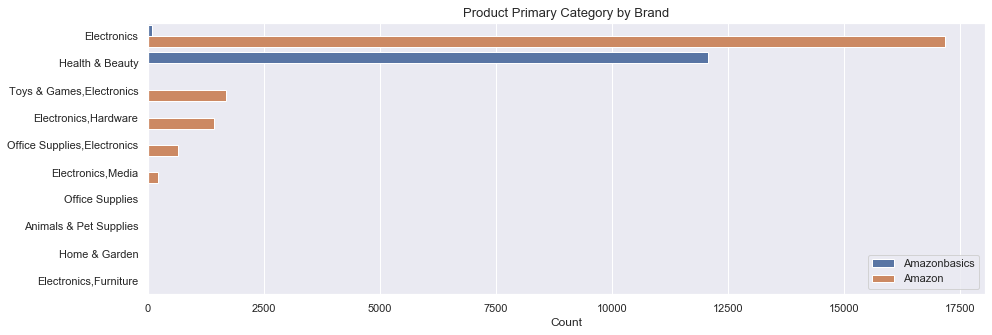

In [39]:
#primary categories
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
ax = sns.countplot(y='primaryCategories', hue='Brand', data=amz,
                   order = amz['primaryCategories'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('')
plt.title('Product Primary Category by Brand', fontsize=13)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32')
plt.legend(loc='lower right')
plt.show()

### Customer Review

Second, I examined customer review characteristics. The ratings are on a 1-5 scale (1 to 5 stars). 70% of them are rated as 5 stars, followed by 4 stars (21%), 3 stars (4%), 2 stars (3%), and 1 star (2%). Among all customer reviews, 60% recommened the product to others, 40% not. 

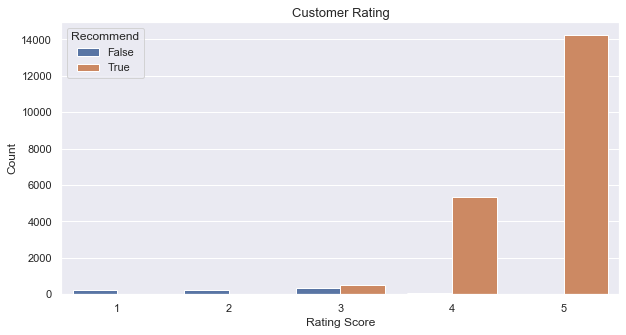

In [41]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="reviews.rating", hue='reviews.doRecommend', data=amz)
plt.ylabel('Count')
plt.xlabel('Rating Score')
plt.title('Customer Rating', fontsize=13)
ax.legend().set_title('Recommend')
plt.show()

Then, I calcluated the total number of reviews and average rating for each product. "Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers" has 2,443 reviews and an average rating of 4.60. I chose this product to focus on in this study. 

In [64]:
#calcuate average review per product 
review = pd.DataFrame(amz.groupby('name')['reviews.rating'].mean().round(2))
review = review.sort_values('reviews.rating', ascending=False)

#total reviews per product 
pop = pd.DataFrame(amz['name'].value_counts())
pop.reset_index(level=0, inplace=True)
pop.columns=['name', 'tot.reviews']

#combine to see the summary per product
prod = pd.merge(pop, review, on='name')
prod = prod.sort_values('tot.reviews', ascending=False)
prod.head(5)

,name,tot.reviews,reviews.rating
0,AmazonBasics AAA Performance Alkaline Batteries (36 Count),8343,4.45
1,AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,3728,4.45
2,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",2443,4.60
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",2370,4.58
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",1986,4.55


As we can see from the plot below, customer ratings follow a very similar pattern as the entire sample.

In [68]:
item = pd.DataFrame(amz[amz['name']=='Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers'])

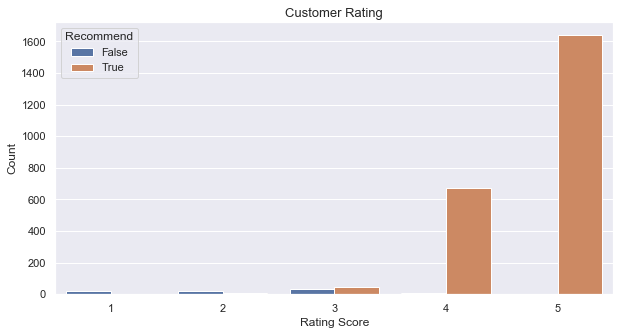

In [69]:
#plot review 
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="reviews.rating", hue='reviews.doRecommend', data=item)
plt.ylabel('Count')
plt.xlabel('Rating Score')
plt.title('Customer Rating', fontsize=13)
ax.legend().set_title('Recommend')
plt.show()

Moreover, I explored customer's feedback based on their review title and text. As we can see from word count, review text contains richer information. 

In [71]:
#word count for review.title and review.text 
item['word_count_text'] = item['reviews.text'].apply(lambda x: len(str(x).split(" ")))
item['word_count_title'] = item['reviews.title'].apply(lambda x: len(str(x).split(" ")))

In [83]:
stats1 = pd.DataFrame(item['word_count_title'].describe())
stats2 = pd.DataFrame(item['word_count_text'].describe())
stats1.reset_index(level=0, inplace=True)
stats2.reset_index(level=0, inplace=True)
stats1.columns = ['stats', 'word_count_title']
stats2.columns = ['stats', 'word_count_text']
stats = pd.merge(stats1, stats2, on='stats')
stats

,stats,word_count_title,word_count_text
0,count,2443.000000,2443.000000
1,mean,3.503889,28.829308
2,std,1.925593,26.963179
3,min,1.000000,1.000000
4,25%,2.000000,13.000000
5,50%,3.000000,20.000000
6,75%,5.000000,34.000000
7,max,14.000000,332.000000


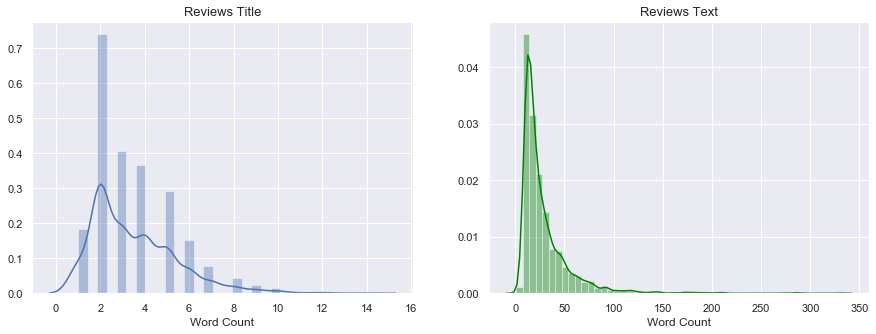

In [72]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(item['word_count_title'])
plt.title('Reviews Title', fontsize=13)
plt.xlabel('Word Count')

plt.subplot(1,2,2)
ax2 = sns.distplot(item['word_count_text'], color='green')
plt.title('Reviews Text', fontsize=13)
plt.xlabel('Word Count')

plt.show()

To explore further, I built a linear regression model to predict whether a customer will recommend the product by the words he used in his review.

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=3, max_df=0.4, ngram_range=(1,3))

In [86]:
#regression with review text 
X = tfidf.fit_transform(item['reviews.text'])

In [87]:
df_tfidf = pd.DataFrame(X.todense())
df_tfidf.columns = tfidf.get_feature_names()
df_tfidf.head()

,00,10,10 inch,10 year,10 year old,100,100 dollars,11,11 year,11 year old,...,your money,your purse,your reading,youtube,youtube and,youtube videos,yr,yr old,yr old daughter,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.117198,0.117198,0.0,0.0


In [178]:
score = item['reviews.doRecommend']

lr.fit(df_tfidf, score)
coef = pd.Series(lr.coef_, index=df_tfidf.columns)

text = pd.DataFrame(coef.sort_values())
text.reset_index(level=0, inplace=True)
text.columns = [['word', 'coef']]
text.head(70)

,word,coef
0,not good,-1.254654
1,on the fire,-1.115793
2,trouble,-0.936639
3,use google,-0.854192
4,all ages,-0.845735
5,loves it this,-0.842597
6,13,-0.803677
7,have only,-0.789114
8,have owned,-0.782495
9,not very,-0.778615


The regression coefficient result provides useful information to look up in the original review text. I searched informative key words and read through customers' original review text. I found that, in general, people like this tablet becasue it's inexpensive comparing to other products (e.g., iPad) and it's convenient for reading books especially with the advantage of prime library. Major complaints about this product include limited Amazon apps, too many adds, random/frequent freezing, Amazon's silk not user friendly, many things designed exclusively to Amazon, and lack of google chrome compability. Many of these are directly related the brand to their perception of the Amazon brand. In addition, Amazon makes revenue by selling ads. Therefore, I recommend focusing on the freezing issue which is business actionable intelligence. There are nine customers wrote relatively long reviews and mentioned their frustration with the freezing issue which had a negative impact on their experience. 

In [101]:
#review specific review text #mask
words_in_text = ['freeze'] 
for word in words_in_text:
    df = item['reviews.text'].apply(lambda x: word in x)
    df = item[df][['reviews.title', 'reviews.text','reviews.rating','reviews.doRecommend']]
df

,reviews.title,reviews.text,reviews.rating,reviews.doRecommend
26259,Excellent for it's price point.,"I bought this because I was tired of watching Youtube and Twitch on my phone. Excellent display sound is decent-not great but you can always buy a speaker. The negatives are-it is definitely a fingerprint magnet, and the Spectrum TV app is AWFUL-the app works fine on my phone, but for some reason on this tablet it freezes and is unusable. All things considered, for 65 bucks it's hard to be beat.",4,True
26360,Fire Tablet - great for entertainment,"I purchased the kindle fire because I needed a entertainment only device for long flights. This device is the perfect size for travel and easy to use and set up with your Amazon account. It is worth purchasing a Fire tablet if you are an Amazon Prime member. If not, I would not recommend it because the available apps are limited . My only complaint about this device is that if it freezes it is difficult to reset.",4,True
26645,Great,"The only reason why I have not given a 5 star review is because sometimes, the unit freezes out of nowhere after I will be reading news articles or after watching Prime/Netflix",4,True
27367,Great tablet for the price,Overall this is a great product. It sometimes freezes with some of the games but other apps work great. Alexa is a great addition.,3,True
27410,"Great tablet, only problem..","I bought this for my 7 year old when her Samsung tablet stopped charging. I love the design. Only problem so far is that it randomly freezes and sometimes the volume button won't respond. Other than that, great for the price.",4,True
27799,Mom's Firestick,"As I reviewed different tablets, this tablet kept coming back as my best option for the items I was looking for. It IS a great tablet, but there are a few things I don't really like about it. I didn't realize that Amazon has it's OWN browser SILK. Everything even your banking info goes through Amazon. Not sure I like that. Also, items don't automatically close out when you leave a page and I have to frequently hit the button on the bottom and close out multiple items. It might just be that I am not THAT computer savoy, though I do know how to navigate my way around. Sometimes the touch feature just seems to freeze and won't recognize that I am attempting 'touch'. Lastly, the on/off button is right where you hold the tablet on the side, so I am often 'accidently' shutting it down. Most annoying! Overall, I am happy with my purchase and for the price I like it. Just wanted to point out the other items.",4,True
27947,Not ad happy with this one by far,"I have had every version of the Kindle since the week it was introduced and jumped at the chance for a Kindle Fire. I replaced the first one I had in 2014 and it was everything I wanted except this past summer it started overheating and got nonresponsive in the midday heat. So...I got this one. First of all I miss Swype. WHY get rid of it? Secondly I cannot put two of my favorite apps (which work on my old one) to work on this but lastly and most importantly: every once in awhile the screen freezes with a bunch of code ""shimmering"" in the background and only turning it off and/or leaving it for awhile brings it back to life AND it turns itself off. It seems to happen when I close a program and move to a new one. Aggravating and not what I expect from a product with which I have been happy in the past.",3,False
27948,Not an iPad by any means,"This tablet is great for books, audible books, music and all things Amazon. The included browser (Silk) is not the best. I purchased expanded memory (64GB SD card) for about $30 more and a cover for about $20. The biggest issue I have with this unit is that it is slow (when compared to an iPad) and it tends to freeze every so often. For about 2.5x more money, consider an iPad instead.",3,False
28331,You get what your paying for,"At ninety dollars, the expectionations are low, but this is still a very good table, it's good for light 

## Statement of Problem

As we can see from above data analysis, an obvious drawback of this product is that it freezes too often or just randomly. Some possible reasons could be: 1) software was released prematurally without undergoing rigorous QA process, 2) software was not fully compatible with the hardware, 3) users ran so many apps simutaneously and the hardware cannot support, 4) there could be certain percentage hardware defects. It is important to overcome this drawback to enhance user experience. 

## Potential Solution

A new version is developed by upgrading the software and fixing software bugs. I expect this change will improve user experience. 

## Method 

I will randomly select 1,000 amazon prime members. As an appreciation for being a loyal customer, I will give the Fire HD 8 tablets (with software change) to the test group for daily use. The exsisting Fire HD 8 tablet users form the control group. This is an A/B manipulation where the change is made or not.

I will roll out the experiment for a month. Normally, if a tablet freezes, we have to force restart it. Therefore, the variable of interest is the number of force restarts. Whenever the user force restarts the tablet, the system will automatically log it into Amazon server. At the end of the experiment, each user's report will be generated and compiled by the server. 

The final dataset will consist of total number customers in rows and three columns including user id, group identifier, and total number of force restarts. Then I will run a two sample t-test to test the difference of the total number of force starts between these two groups. If there is a significant difference and the mean of (control group - test group) is positive. I can conclude that this change will improve user experience.